C:\Users\gauta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2755 - loss: 1.9784
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3821 - loss: 1.7045
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4225 - loss: 1.6100
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4477 - loss: 1.5441
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4596 - loss: 1.5093
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4752 - loss: 1.4612
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4886 - loss: 1.4279
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4908 - loss: 1.4180
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5004 - loss: 1.3900
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5057 - loss: 1.3725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


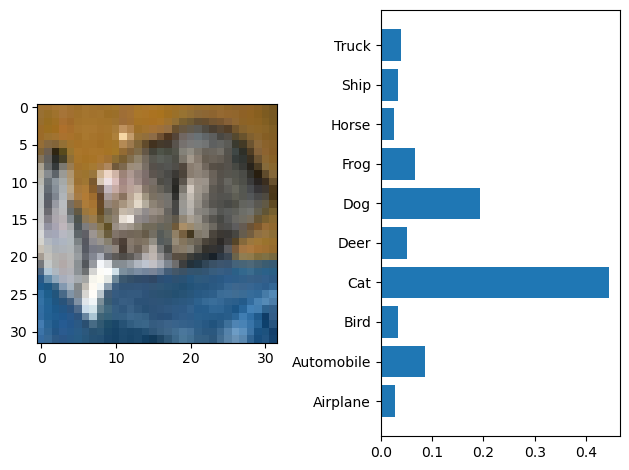

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


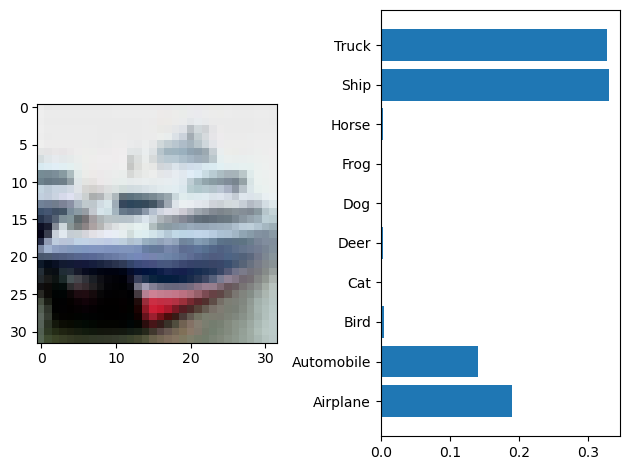

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


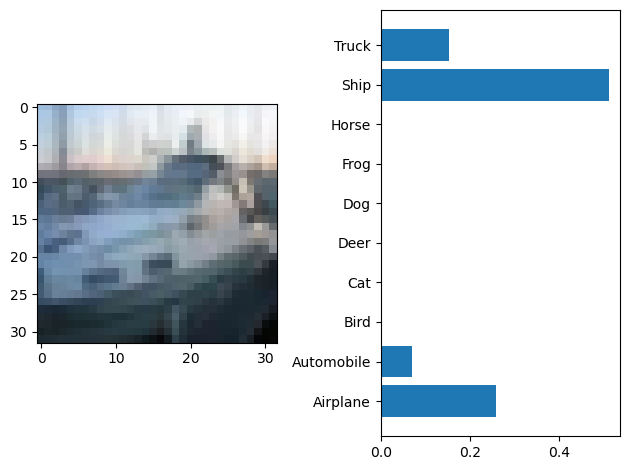

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

X_train=X_train/255
X_test=X_test/255
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train_cat,epochs=10)

class_labels=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

for i in range(3):
    plt.subplot(1,2,1)
    plt.imshow(X_test[i])
    plt.subplot(1,2,2)
    pred=model.predict(X_test[i].reshape(1,32,32,3))
    plt.barh(class_labels,pred[0])
    plt.tight_layout()
    plt.show()